In [1]:
import numpy as np
import sys
sys.path.append('..')

### Modeling a Sensed Component
(1 component with 1 sensor)

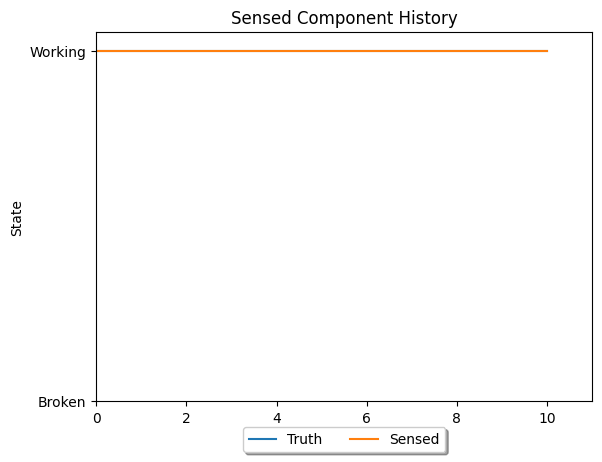

In [2]:
from shipClass.Sensor import Sensor
from shipClass.Component import Component
from shipClass.SensedComp import SensedComp

import numpy as np

states={0:'Broken' , 1:'Working'}
comp_transition_matrix = np.array([[1, 0],
                                    [0.25, 0.75]])
sensor_transition_matrix = np.array([[1, 0],
                                    [0.5, 0.5]])

c1 = Component("comp1", states, comp_transition_matrix)
s1 = Sensor("sensor1", states, sensor_transition_matrix)

sc1 = SensedComp(states, comp_transition_matrix, states, sensor_transition_matrix, 1, 'comp1')
sc1.simulate(10)
sc1.plotHistory()
sc1.printHistory2Excel('testResults/sensedComp_test1.xlsx')

### Testing a component with multiple sensors
(1 component with multiple attached sensors)

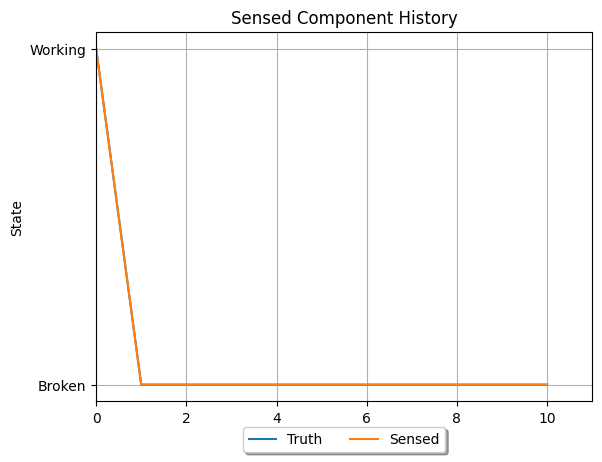

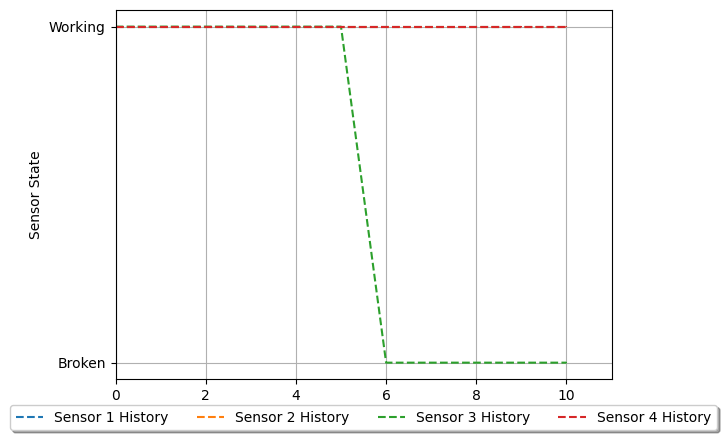

In [3]:
from shipClass.SensedComp import SensedComp

states={0:'Broken' , 1:'Working'}
comp_transition_matrix = np.array([[1, 0],
                                    [0.5, 0.5]])
sensor_transition_matrix_1 = np.array([[1, 0],
                                    [0.5, 0.5]])

sensor_transition_matrix_2 = np.array([[1, 0],
                                    [0.01, 0.99]])

# create a SensedComp with multiple sensors
sc1 = SensedComp(states, comp_transition_matrix, states, sensor_transition_matrix_2, 4, 'highRelSensors')
sc1.simulate(10)
sc1.plotHistory(True)
# sc1.printHistory2Excel('testResults/sensedComp_test2.xlsx')

#check that all sensors have the same history length
# for i in range(len(sc1.sensors)):
#     print(len(sc1.sensors[i].history))

In [4]:
from shipClass.SensedComp import SensedComp

# create one high reliability component and two low-reliability ones
comp_states = { 0: 'Critical Failure',
           1: 'Degredation Failure',
           2: 'Incipent Failure', 
           3: 'Normal Operation'}

high_rel_mat = [[1, 0, 0, 0], 
                [0.4, 0.6, 0, 0],
                [0.2, 0.2, 0.6, 0],
                [0.025, 0.025, 0.05, 0.9]]

low_rel_mat = [[1, 0, 0, 0], 
                [0.5, 0.5, 0, 0],
                [0.2, 0.3, 0.5, 0],
                [0.2, 0.1, 0.1, 0.6]]

# assuming all components will have a default sensor with the same states and matrix (good sensing capability)
sensor_states = {0: 'Faulty',
                 1: 'Normal Operation'}
sensor_mat = [[1, 0],
              [0.15, 0.85]]

# initialize three sensed components, one for each of the components above
# the sensor is the same for all three components, but they can be different if desired
sc1 = SensedComp(comp_states, high_rel_mat, sensor_states, sensor_mat, 1, 'Comp1_HR')
sc2 = SensedComp(comp_states, high_rel_mat, sensor_states, sensor_mat, 1, 'Comp2_LR')
sc3 = SensedComp(comp_states, high_rel_mat, sensor_states, sensor_mat, 1, 'Comp3_LR')

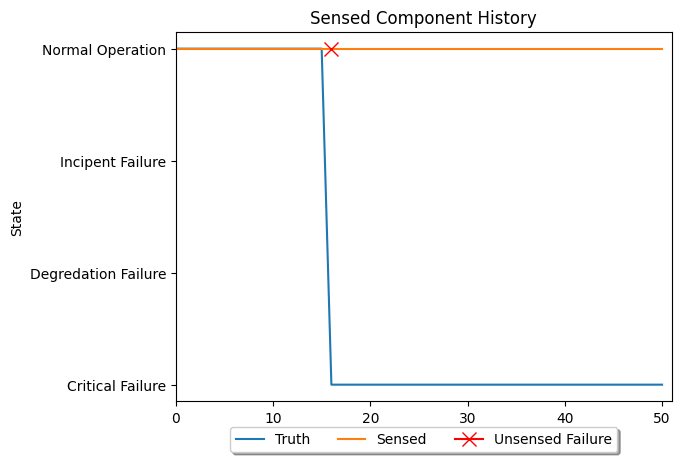

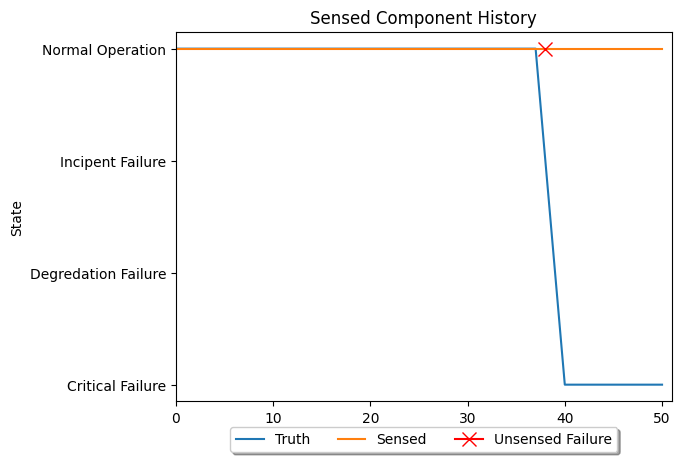

In [5]:
# sc1.simulate(50)
# sc1.plotHistory()
# sc1.reset()
sc1.printHistory2Excel('testResults/sensedComp1.xlsx')

sc2.simulate(50)
sc2.plotHistory()
sc2.reset()
sc2.printHistory2Excel('testResults/sensedComp2.xlsx')

sc3.simulate(50)
sc3.plotHistory()
sc3.reset()
sc3.printHistory2Excel('testResults/sensedComp3.xlsx')
